In [104]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import matplotlib.patches as patches

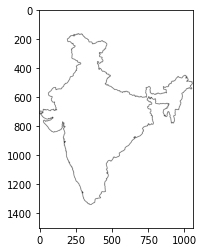

In [105]:
img = mpimg.imread("gray_image.png")
plt.imshow(img, cmap='gray')

In [141]:
def markPoint(x, y, width=5, edgeColor="r"):
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), 3, 3, linewidth=width, edgecolor=edgeColor, facecolor='none')
    return rect

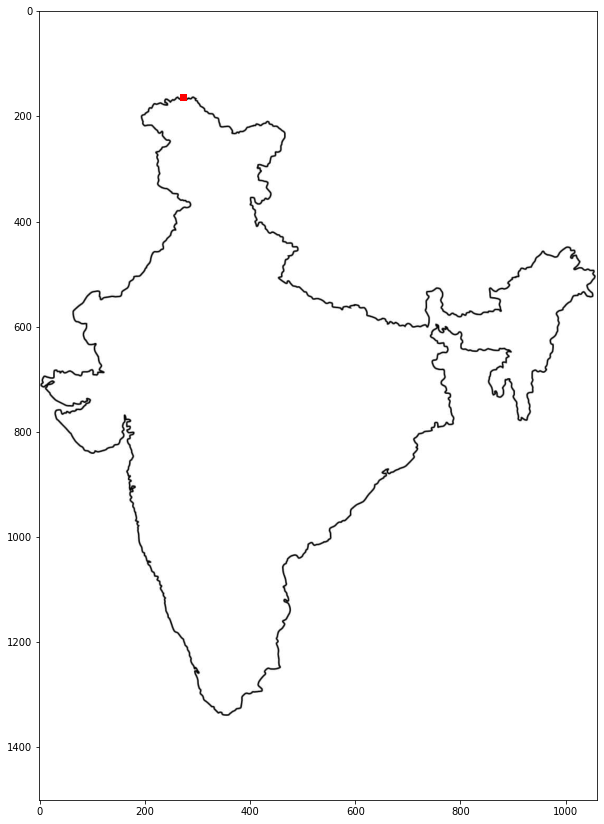

In [115]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,100))
x_loop_must_break = False
points = []
for col_num, col in enumerate(img):
    for row_num, row in enumerate(col):
        if(row==0):
            points.append( (row_num, col_num) )
            x_loop_must_break = True
            break 
    if x_loop_must_break: break

for point in points:
    ax.add_patch(markPoint(point[0],point[1]))

ax.imshow(img, cmap='gray')
ax.set_figure = (10,100)


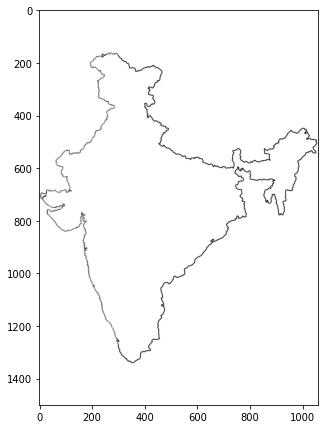

In [48]:
img_t = img.copy()
for row_index, row in enumerate(img_t):
    for col_index, col in enumerate(row):
        if(img_t[row_index][col_index]==0):
            img_t[row_index][col_index] = 1
        # if(img_t[row_index][col_index] > 0 and img_t[row_index][col_index] < 1):
        #     img_t[row_index][col_index] = 1
        if(col_index>=300):
            break
    # if(row_index>=300):
    #     break
plt.figure(figsize = (5,100))
plt.imshow(img_t, cmap="gray")

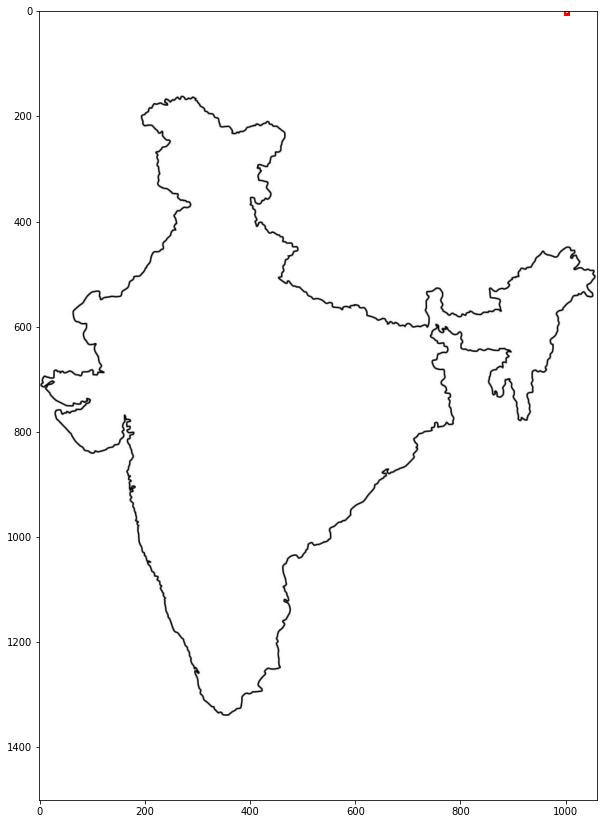

In [51]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,100))
ax.add_patch(markPoint(1000,0))

ax.imshow(img, cmap='gray')
ax.set_figure = (10,100)


In [66]:
img_t = img.copy()
row_count = len(img_t)    # row count
col_count = len(img_t[0]) # col count
print("row count : ", row_count, " col count : ", col_count)
cords = [
    (0,0),                  # top left
    (col_count, 0),         # top right
    (col_count, row_count), # bottom right
    (0, row_count),         # bottom left
]

row count :  1500  col count :  1061


In [73]:
def findCenterPoint(cords, image):
    x_points_count = 0
    y_points_count = 0
    x_points_sum = 0
    y_points_sum = 0
    # summation of x and y
    for points in cords:
        x_points_sum += points[0]
        y_points_sum += points[1]
        y_points_count += 1
        x_points_count += 1
    # centroid: summation divided by number of nodes      
    center = (x_points_sum/x_points_count, y_points_sum/y_points_count)
    # a       e          b
    # h   centroid(z)    f
    # d       g          c
    #
    # e = (xz, ya)
    # f = (xb, yz)
    # g = (xz, yc)
    # h = (xd, yz)
    #
    # e
    top = (center[0], cords[0][1])
    # f
    right = (cords[1][0], center[1])
    # g
    bottom = (center[0], cords[2][1])
    # h
    left = (cords[2][0], center[1])
    return {"center" : center, "border" : (top, right, bottom, left)}

findCenterPoint(cords, img_t)

{'center': (530.5, 750.0),
 'border': ((530.5, 0), (1061, 750.0), (530.5, 1500), (1061, 750.0))}

(530.5, 0)
(1061, 750.0)
(530.5, 1500)
(1061, 750.0)


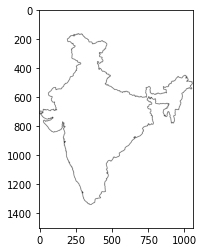

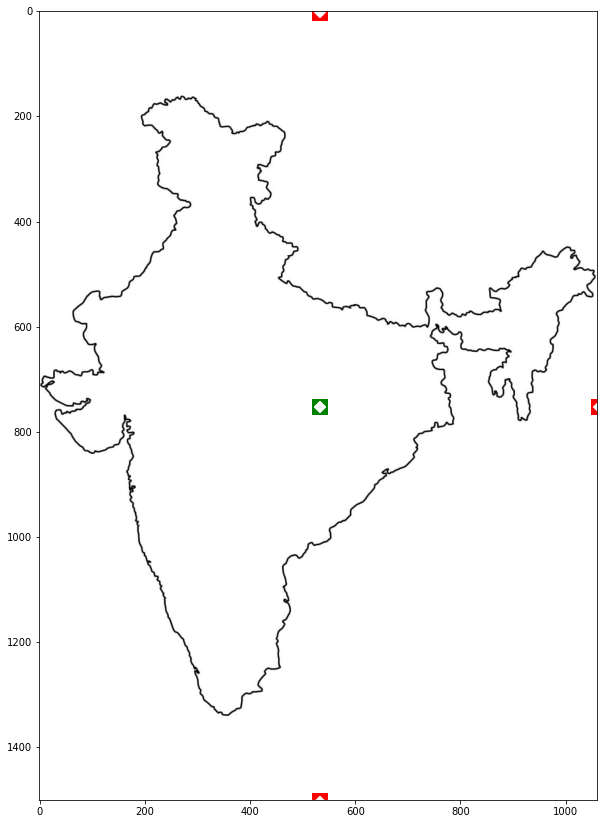

In [97]:
img = mpimg.imread("gray_image.png")
plt.imshow(img, cmap='gray')
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,100))
x_loop_must_break = False
points = findCenterPoint(cords, img_t)
for point in points['border']:
    print(point, end="\n")
    ax.add_patch(markPoint(point[0],point[1],width=15))

ax.add_patch(markPoint(points['center'][0],points['center'][1], width=15,edgeColor="g"))

ax.imshow(img, cmap='gray')
ax.set_figure = (10,100)


In [98]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


/tmp/ipykernel_17818/2503920456.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1000], [0, 1000], 'ro-', c="#f00")


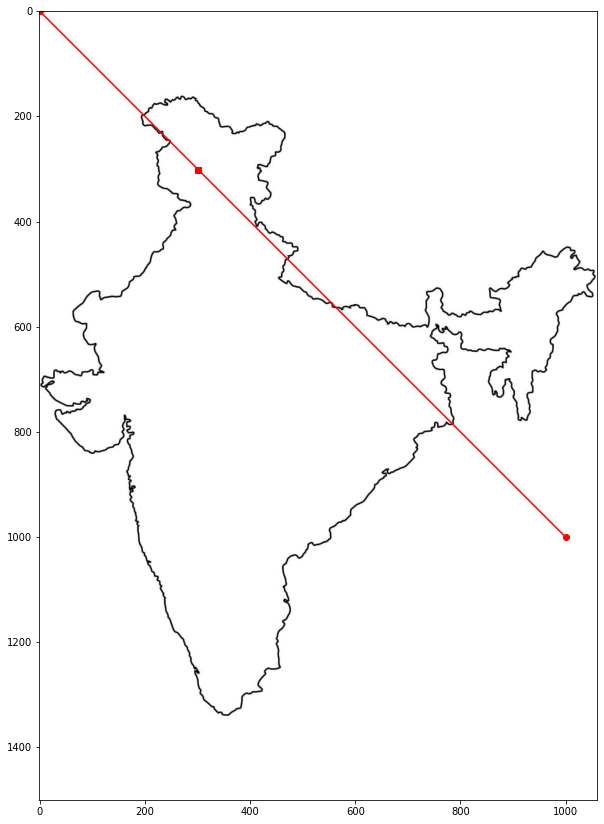

In [138]:
fig, ax = plt.subplots(figsize = (10,100))

p = []
polygon = Polygon(np.random.rand(num_sides ,2), True)
p.append(polygon)

# Create figure and axes
ax.add_patch(markPoint(300, 300))
plt.plot([0, 1000], [0, 1000], 'ro-', c="#f00")

ax.imshow(img, cmap='gray')
# ax.set_figure = (10,100)


# p = PatchCollection(patches, cmap="gray", alpha=0.4)

# colors = 100*np.random.rand(len(patches))
# p.set_array(np.array(colors))

# ax.add_collection(p)
# ax.imshow()

In [150]:
def drawBox(plt, boxes, color="#f00"):
    for box in boxes:
        i = 0
        first_point = None
        past_point = None
        while(i < 4):
            if(i==0):
                first_point = box[i]
                past_point = box[i]
                i += 1
                continue
            drawLine(plt, past_point, box[i], color)
            past_point = box[i]
            i += 1
            # break
        drawLine(plt, past_point, first_point, color)
        # break

In [151]:
def markPoint(plt, x, y, size=100, color="#00f"):
    plt.scatter(x_coordinates, y_coordinates, s=point_size, c=color)
    # rect = patches.Rectangle((x, y), length, length, linewidth=width, edgecolor=edgeColor, facecolor='none')
    # return rect

[0, 1061, 1061, 0]


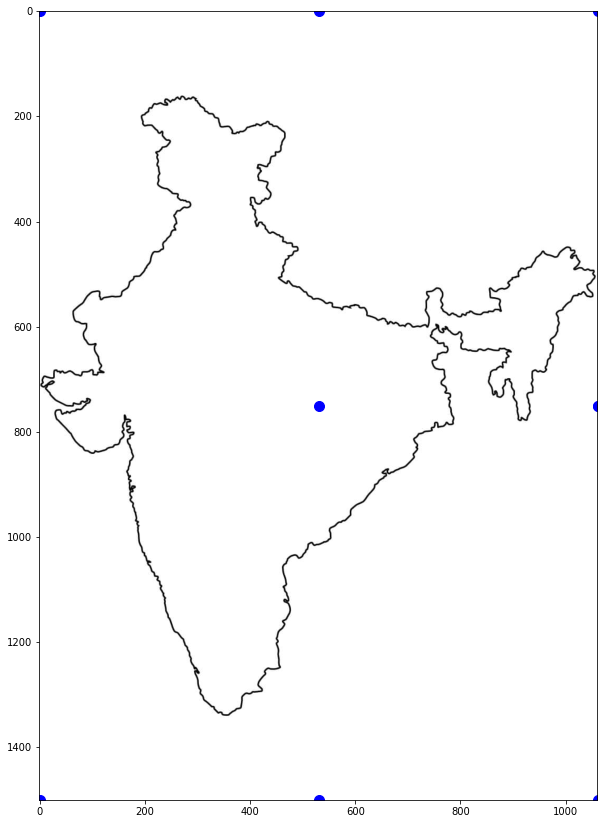

In [154]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (10,100))
point_length = 10
point_width = 10
point_size = 100

# mark first border corrdinates with red
x_coordinates = []
y_coordinates = []
for p in cords:
    x_coordinates.append(p[0])
    y_coordinates.append(p[1])
    # ax.add_patch(markPoint(p[0],p[1], length=point_length, width=point_width, edgeColor="b"))
color = "#f00"
print(x_coordinates)
markPoint(plt, x_coordinates, y_coordinates)
    
# mark center corrdinates with green
points = findCenterPoint(cords, img_t)
x_coordinates = [points['center'][0]]
y_coordinates = [points['center'][1]]
color = "#0f0"
markPoint(plt, x_coordinates, y_coordinates,)

# mark new border corrdinates with green
x_coordinates = []
y_coordinates = []
for point in points['border']:
    x_coordinates.append(point[0])
    y_coordinates.append(point[1])

color = "#00f"

markPoint(plt, x_coordinates, y_coordinates,)


plt.imshow(img, cmap='gray')
